In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, how="right", on=["city", "city"])
pyber_data = pyber_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

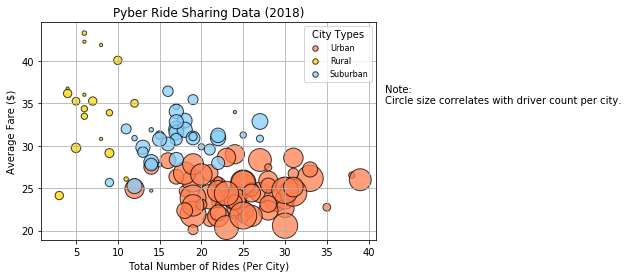

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_city_type = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
rural_city_type = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])
suburban_city_type = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])
# Urban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size)
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

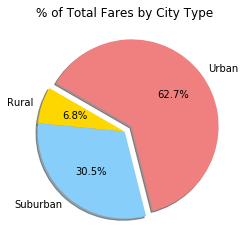

In [5]:
# Calculate Type Percents
type_groupped = pyber_data.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()


In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

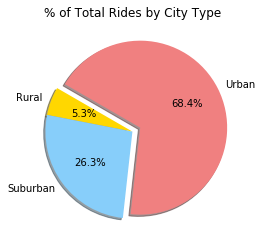

In [7]:
# Calculate Type Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")


In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

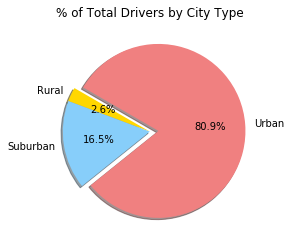

In [9]:
# Calculate Type Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()


In [10]:
# Show Figure
plt.show()